In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [2]:
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
dataset = datasets.ImageFolder(root='Rice_Image_Dataset', transform=data_transforms)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [5]:
model = torch.hub.load('pytorch/vision:v0.10.0','googlenet',pretrained=True)

Using cache found in /Users/sivaprasanth/.cache/torch/hub/pytorch_vision_v0.10.0
/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [8]:
losses = []
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}')

Epoch 1, Loss: 0.8752582295546456
Epoch 2, Loss: 0.13800971458355585
Epoch 3, Loss: 0.057160325141416654
Epoch 4, Loss: 0.04954430293883123
Epoch 5, Loss: 0.022970578928906766
Epoch 6, Loss: 0.037927701684927186
Epoch 7, Loss: 0.027851145943656327
Epoch 8, Loss: 0.023707164126256154
Epoch 9, Loss: 0.021243786154728796
Epoch 10, Loss: 0.016517445408103484


In [9]:
correct = 0
total = 0
with torch.no_grad():
  for inputs, labels in val_loader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy on validation set: {100 * correct / total}%')

Accuracy on validation set: 99.8%


Text(0, 0.5, 'Loss')

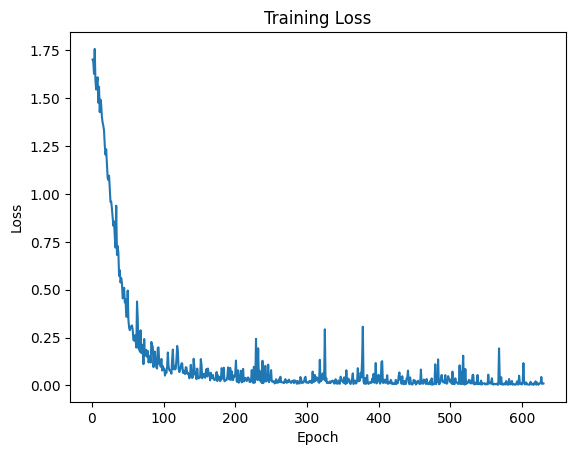

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1,631),losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')